<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/UretimOptimizasyonu__AracMontaj_Hatti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Üretim Optimizasyonu – Araç Montaj Hattı
•	Veri Kaynakları: Üretim hattı sensör verileri, iş gücü verimliliği, üretim süresi.
•	Amaç: Araç montaj hattındaki verimsizlikleri analiz ederek üretim süreçlerini optimize etmek.
•	Teknikler:
o	Optimizasyon Algoritmaları
o	Zaman Serisi ve İstatistiksel Analizler: Üretim süreçlerini ve parça temin sürelerini tahmin etmek.
o	Veri Entegrasyonu ve Otomasyon: Azure platformunda süreç otomasyonu



In [ ]:
!pip install pandas numpy scipy matplotlib scikit-learn deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np  # numpy kütüphanesini ekledik

# Örnek veri seti oluşturma
data = {
    'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='h'),  # 'H' yerine 'h' kullandık
    'sensor_data': np.random.rand(100) * 100,  # Sensör verileri
    'workforce_efficiency': np.random.rand(100) * 10,  # İş gücü verimliliği
    'production_time': np.random.rand(100) * 5  # Üretim süresi (saat)
}

df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)
print(df.head())

                     sensor_data  workforce_efficiency  production_time
timestamp                                                              
2023-01-01 00:00:00     8.132802              3.387238         2.451814
2023-01-01 01:00:00    43.986698              6.827689         4.192844
2023-01-01 02:00:00    16.505448              0.608933         4.621625
2023-01-01 03:00:00    85.901220              9.237657         0.372963
2023-01-01 04:00:00    73.047017              2.859015         3.535170


3. Veri Analizi ve Görselleştirme
Verileri analiz ederek trendleri ve verimsizlikleri belirleyelim.

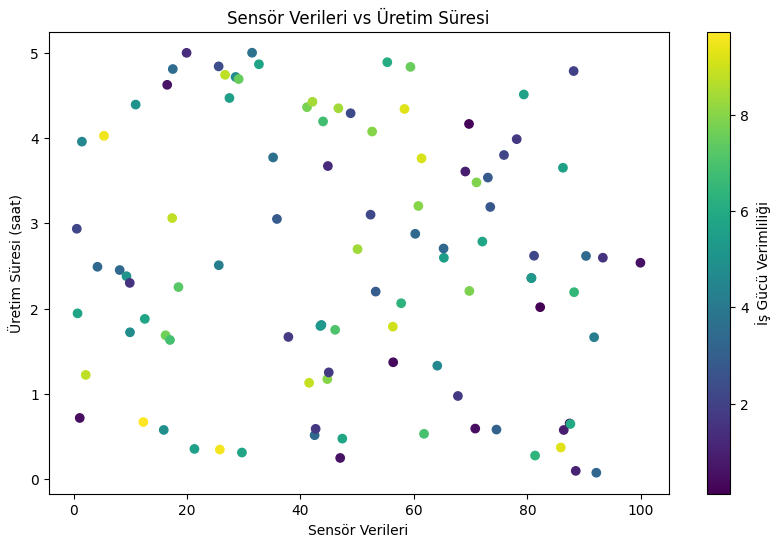

In [ ]:
import matplotlib.pyplot as plt

# Sensör verileri ve üretim süresi arasındaki ilişki
plt.figure(figsize=(10, 6))
plt.scatter(df['sensor_data'], df['production_time'], c=df['workforce_efficiency'], cmap='viridis')
plt.colorbar(label='İş Gücü Verimliliği')
plt.xlabel('Sensör Verileri')
plt.ylabel('Üretim Süresi (saat)')
plt.title('Sensör Verileri vs Üretim Süresi')
plt.show()

4. Zaman Serisi Analizi
Üretim süreçlerini ve parça temin sürelerini tahmin etmek için zaman serisi analizi yapalım.

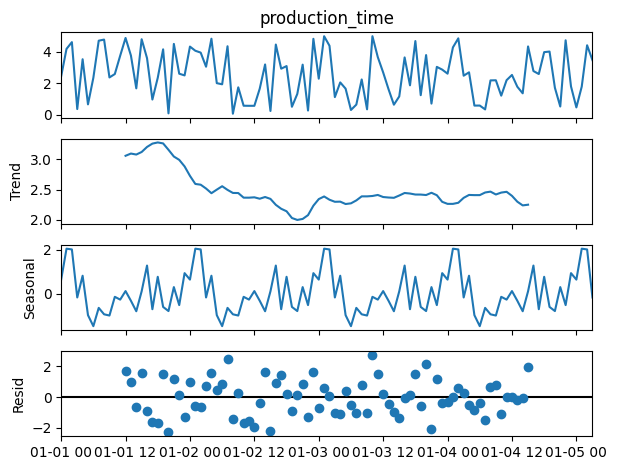

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Zaman serisi analizi
result = seasonal_decompose(df['production_time'], model='additive', period=24)
result.plot()
plt.show()

5. Optimizasyon Algoritmaları
Genetik algoritma kullanarak üretim süreçlerini optimize edelim.

In [ ]:
from deap import base, creator, tools, algorithms
import random

# Amaç fonksiyonu: Üretim süresini minimize etmek
def evaluate(individual):
    return sum(individual),  # Örnek bir amaç fonksiyonu

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=True)

gen	nevals
0  	50    
1  	28    
2  	36    
3  	38    
4  	26    
5  	26    
6  	31    
7  	37    
8  	35    
9  	38    
10 	31    
11 	32    
12 	29    
13 	33    
14 	28    
15 	25    
16 	26    
17 	29    
18 	34    
19 	24    
20 	34    
21 	32    
22 	26    
23 	38    
24 	32    
25 	26    
26 	27    
27 	25    
28 	29    
29 	20    
30 	27    
31 	34    
32 	34    
33 	36    
34 	25    
35 	32    
36 	28    
37 	35    
38 	26    
39 	31    
40 	32    


([[-4.822729884581157,
   -3.160584660183192,
   -2.186183131077639,
   -5.155933096579972,
   -3.3769163968179052,
   -7.532041951370455,
   -1.903607928703018,
   -0.6160798951419083,
   -5.004906133265973,
   -2.036986865907377],
  [-4.822729884581157,
   -3.160584660183192,
   -2.186183131077639,
   -4.483942187302475,
   -1.8503052242897733,
   -9.655194547025028,
   -1.8344950310877215,
   -0.6160798951419083,
   -5.004906133265973,
   -2.036986865907377],
  [-4.822729884581157,
   -3.160584660183192,
   -2.186183131077639,
   -4.483942187302475,
   -3.3769163968179052,
   -8.484506161066864,
   -1.8344950310877215,
   -0.6160798951419083,
   -5.004906133265973,
   -2.036986865907377],
  [-4.822729884581157,
   -3.160584660183192,
   -2.186183131077639,
   -4.483942187302475,
   -3.3769163968179052,
   -8.484506161066864,
   -1.8344950310877215,
   -0.6160798951419083,
   -5.004906133265973,
   -2.036986865907377],
  [-4.822729884581157,
   -3.160584660183192,
   -2.1861831310776